Introduction to NLTK
====================

NLTK is the *Natural Language Toolkit*, a fairly large Python library for doing many sorts of linguistic analysis of text. NLTK comes with a selection of sample texts that we'll use to day, to get yourself familiar with what sorts of analysis you can do.

To run this notebook you will need the `nltk`, `matplotlib`, and `tkinter` modules. If you are new to Python and programming, the best way to have these is to make sure you are using the [Anaconda Python distribution](http://continuum.io/downloads#py34), which includes all of these and a whole host of other useful libraries. You can check whether you have the libraries by running the following commands **in a Terminal or Powershell window**:

    python -c 'import nltk'
    python -c 'import matplotlib'
    python -c 'import tkinter'
    
If you don't have NLTK, you can install it using the `pip` command (or possibly `pip3` if you're on a Mac) as usual.

    pip install nltk
    
If you don't have Matplotlib or TkInter, and don't want to download Anaconda, you will be able to follow along with most but not all of this notebook.

Once all this package installation work is done, you can run

    python -c 'import nltk; nltk.download()'
    
or, if you are on a Mac with Python 3.4 installed via the standard Python installer:

    python3 -c 'import nltk; nltk.download()'
    
and use the dialog that appears to download the 'book' package.

Examining features of a text
--------------------------
We will start by loading the example texts in the 'book' package that we just downloaded. 

In [1]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


This `import` statement reads the book samples, which include nine sentences and nine book-length texts. It has also helpfully put each of these texts into a variable for us, from `sent1` to `sent9` and `text1` to `text9`.

In [2]:
print(sent1)
print(sent3)
print(sent5)

['Call', 'me', 'Ishmael', '.']
['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
['I', 'have', 'a', 'problem', 'with', 'people', 'PMing', 'me', 'to', 'lol', 'JOIN']


Let's look at the texts now.

In [3]:
print(text6)
print(text6.name)
print("This text has %d words" % len(text6.tokens))
print("The first hundred words are:", " ".join( text6.tokens[:100] ))

<Text: Monty Python and the Holy Grail>
Monty Python and the Holy Grail
This text has 16967 words
The first hundred words are: SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there ! [ clop clop clop ] SOLDIER # 1 : Halt ! Who goes there ? ARTHUR : It is I , Arthur , son of Uther Pendragon , from the castle of Camelot . King of the Britons , defeator of the Saxons , sovereign of all England ! SOLDIER # 1 : Pull the other one ! ARTHUR : I am , ... and this is my trusty servant Patsy . We have ridden the length and breadth of the land in


Each of these texts is an nltk.text.Text object, and has methods to let you see what the text contains. But you can also treat it as a plain old list!

In [4]:
print(text5[0])
print(text3[0:11])
print(text4[0:51])

now
['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of', 'Representatives', ':', 'Among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.']


We can do simple concordancing, printing the context for each use of a word throughout the text:

In [5]:
text6.concordance( "swallow" )

Displaying 10 of 10 matches:
 is a temperate zone . ARTHUR : The swallow may fly south with the sun or the h
be carried . SOLDIER # 1 : What ? A swallow carrying a coconut ? ARTHUR : It co
o maintain air - speed velocity , a swallow needs to beat its wings forty - thr
: It could be carried by an African swallow ! SOLDIER # 1 : Oh , yeah , an Afri
OLDIER # 1 : Oh , yeah , an African swallow maybe , but not a European swallow 
 swallow maybe , but not a European swallow . That ' s my point . SOLDIER # 2 :
 and Sir Bedevere , not more than a swallow ' s flight away , had discovered so
omething . Oh , that ' s an unladen swallow ' s flight , obviously . I mean , t
 air - speed velocity of an unladen swallow ? ARTHUR : What do you mean ? An Af
o you mean ? An African or European swallow ? BRIDGEKEEPER : Huh ? I -- I don '


The default is to show no more than 25 results for any given word, but we can change that.

In [6]:
text6.concordance('Arthur', lines=37)

Displaying 37 of 261 matches:
                                    ARTHUR : Whoa there ! [ clop clop clop ] S
LDIER # 1 : Halt ! Who goes there ? ARTHUR : It is I , Arthur , son of Uther P
Who goes there ? ARTHUR : It is I , Arthur , son of Uther Pendragon , from the
 SOLDIER # 1 : Pull the other one ! ARTHUR : I am , ... and this is my trusty 
ER # 1 : What ? Ridden on a horse ? ARTHUR : Yes ! SOLDIER # 1 : You ' re usin
IER # 1 : You ' re using coconuts ! ARTHUR : What ? SOLDIER # 1 : You ' ve got
d you ' re bangin ' ' em together . ARTHUR : So ? We have ridden since the sno
 : Where ' d you get the coconuts ? ARTHUR : We found them . SOLDIER # 1 : Fou
Mercea ? The coconut ' s tropical ! ARTHUR : What do you mean ? SOLDIER # 1 : 
: Well , this is a temperate zone . ARTHUR : The swallow may fly south with th
e you suggesting coconuts migrate ? ARTHUR : Not at all . They could be carrie
at ? A swallow carrying a coconut ? ARTHUR : It could grip it by the husk ! SO
uld not carry a one po

We can adjust the amount of context we show in our concordance:

In [7]:
text6.concordance('Arthur', width=100)

Displaying 25 of 261 matches:
                                               ARTHUR : Whoa there ! [ clop clop clop ] SOLDIER # 1 
p clop ] SOLDIER # 1 : Halt ! Who goes there ? ARTHUR : It is I , Arthur , son of Uther Pendragon , 
1 : Halt ! Who goes there ? ARTHUR : It is I , Arthur , son of Uther Pendragon , from the castle of 
l England ! SOLDIER # 1 : Pull the other one ! ARTHUR : I am , ... and this is my trusty servant Pat
ter . SOLDIER # 1 : What ? Ridden on a horse ? ARTHUR : Yes ! SOLDIER # 1 : You ' re using coconuts 
 Yes ! SOLDIER # 1 : You ' re using coconuts ! ARTHUR : What ? SOLDIER # 1 : You ' ve got two empty 
 coconut and you ' re bangin ' ' em together . ARTHUR : So ? We have ridden since the snows of winte
SOLDIER # 1 : Where ' d you get the coconuts ? ARTHUR : We found them . SOLDIER # 1 : Found them ? I
 them ? In Mercea ? The coconut ' s tropical ! ARTHUR : What do you mean ? SOLDIER # 1 : Well , this
OLDIER # 1 : Well , this is a temperate zone . ARTHUR : The s

...or get the number of times any individual word appears in the text.

In [8]:
word_to_count = "KNIGHT"
print("The word %s appears %d times." % ( word_to_count, text6.count( word_to_count ) ))

The word KNIGHT appears 68 times.


We can generate a vocabulary for the text, and use the vocabulary to find the most frequent words as well as the ones that appear only once (a.k.a. the __hapaxes__.)

In [9]:
t6_vocab = text6.vocab()
t6_words = list(t6_vocab.keys())
print("The text has %d different words" % ( len( t6_words ) ))
print("Some arbitrary 50 of these are:", t6_words[:50])
print("The most frequent 50 words are:", t6_vocab.most_common(50))
print("The word swallow appears %d times" % ( t6_vocab['swallow'] ))
print("The text has %d words that appear only once" % ( len( t6_vocab.hapaxes() ) ))
print("Some arbitrary 100 of these are:", t6_vocab.hapaxes()[:100])

The text has 2166 different words
Some arbitrary 50 of these are: ['outside', 'Eh', 'wouldn', 'Splendid', 'Hello', 'nervous', '11', 'he', 'miss', 'problems', 'nor', 'lot', 'cereals', 'knew', 'grail', '17', 'maybe', '-', 'niggets', 'Ridden', 'Message', 'Here', 'never', 'clue', 'spooky', 'enemies', 'migrate', 'ugly', 'under', 'keeper', 'Yeaaah', 'Since', 'Skip', 'Heh', 'gave', 'immediately', 'individually', 'worked', 'will', 'SUN', 'singing', 'Hic', 'grenade', 'whoever', 'argue', 'dynamite', 'would', 'splat', 'peasant', 'Til']
The most frequent 50 words are: [(':', 1197), ('.', 816), ('!', 801), (',', 731), ("'", 421), ('[', 319), (']', 312), ('the', 299), ('I', 255), ('ARTHUR', 225), ('?', 207), ('you', 204), ('a', 188), ('of', 158), ('--', 148), ('to', 144), ('s', 141), ('and', 135), ('#', 127), ('...', 118), ('Oh', 110), ('it', 107), ('is', 106), ('-', 88), ('in', 86), ('that', 84), ('t', 77), ('LAUNCELOT', 76), ('No', 76), ('1', 76), ('your', 75), ('not', 70), ('GALAHAD', 69), ('KNIG

You've now seen two methods for getting the number of times a word appears in a text: `t6.count(word)` and `t6_vocab[word]`. These are in fact identical, and the following bit of code is just to prove that. An `assert` statement is used to test whether something is true - if it ever isn't true, the code will throw up an error! This is a basic building block for writing tests for your code.

In [10]:
print("Here we assert something that is true.")
for w in t6_words:
    assert text6.count( w ) == t6_vocab[w]
    
print("See, that worked! Now we will assert something that is false, and we will get an error.")
for w in t6_words:
    assert w.lower() == w

Here we assert something that is true.
See, that worked! Now we will assert something that is false, and we will get an error.


AssertionError: 

We can try and find interesting words in the text, such as words of a minimum length (the longer a word, the less common it probably is) that occur more than once or twice...

In [11]:
# With a list comprehension
long_words = [ w for w in t6_words if len( w ) > 5 and t6_vocab[w] > 3 ]

# The long way, with a for loop. This is identical to the above.
long_words = []
for w in t6_words:
    if( len ( w ) > 5 and t6_vocab[w] > 3 ):
        long_words.append( w )

print("The reasonably frequent long words in the text are:", long_words)

The reasonably frequent long words in the text are: ['singing', 'Aaaaugh', 'English', 'Galahad', 'chance', 'MASTER', 'domine', 'trumpets', 'person', 'nothing', 'Castle', 'CONCORDE', 'PIGLET', 'taunting', 'really', 'carried', 'rabbit', 'SOLDIER', 'giggle', 'French', 'surprise', 'angels', 'coconut', 'naughty', 'Brother', 'BEDEVERE', 'knights', 'Launcelot', 'Britons', 'shrubberies', 'BRIDGEKEEPER', 'MIDDLE', 'Father', 'sacred', 'questions', 'OFFICER', 'Aaaugh', 'PERSON', 'killed', 'Bedevere', 'Dennis', 'mumble', 'Prince', 'HISTORIAN', 'through', 'people', 'CHARACTER', 'anyway', 'wicked', 'little', 'twenty', 'MINSTREL', 'GALAHAD', 'Grenade', 'dramatic', 'DENNIS', 'saying', 'shrubbery', 'KNIGHT', 'master', 'answer', 'thought', 'RANDOM', 'witches', 'swallows', 'already', 'CARTOON', 'LAUNCELOT', 'Bridge', 'NARRATOR', 'squeak', 'Camelot', 'GUESTS', 'swallow', 'Please', 'INSPECTOR', 'chanting', 'Charge', 'KNIGHTS', 'please', 'CUSTOMER', 'enchanter', 'second', 'Arthur', 'Knights', 'number', 'eas

And we can look for pairs of words that go together more often than chance would suggest.

In [12]:
print("\nUp to twenty collocations")
text6.collocations()

print("\nUp to fifty collocations")
text6.collocations(num=50)

print("\nCollocations that might have one word in between")
text6.collocations(window_size=3)


Up to twenty collocations
BLACK KNIGHT; clop clop; HEAD KNIGHT; mumble mumble; Holy Grail;
squeak squeak; FRENCH GUARD; saw saw; Sir Robin; Run away; CARTOON
CHARACTER; King Arthur; Iesu domine; Pie Iesu; DEAD PERSON; Round
Table; clap clap; OLD MAN; dramatic chord; dona eis

Up to fifty collocations
BLACK KNIGHT; clop clop; HEAD KNIGHT; mumble mumble; Holy Grail;
squeak squeak; FRENCH GUARD; saw saw; Sir Robin; Run away; CARTOON
CHARACTER; King Arthur; Iesu domine; Pie Iesu; DEAD PERSON; Round
Table; clap clap; OLD MAN; dramatic chord; dona eis; eis requiem; LEFT
HEAD; FRENCH GUARDS; music stops; Sir Launcelot; MIDDLE HEAD; RIGHT
HEAD; Sir Galahad; angels sing; Arthur music; Hand Grenade; Three
questions; boom boom; Heh heh; giggle giggle; brave Sir; heh heh; make
sure; oral sex; hee hee; haw haw; pound pound; GREEN KNIGHT; Sir
Knight; Black Beast; Brother Maynard; Holy Hand; Jesus Christ; Castle
Anthrax; scene twenty

Collocations that might have one word in between
saw saw; clop cl

NLTK can also provide us with a few simple graph visualizations, **when we have matplotlib installed**. To make this work in iPython, we need the following magic line. If you are running in PyCharm, then you do not need this line - it will throw an error if you try to use it!

In [13]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


The vocabulary we get from the `.vocab()` method is something called a "frequency distribution", which means it's a giant tally of each unique word and the number of times that word appears in the text. We can also make a frequency distribution of other features, such as "each possible word length and the number of times a word that length is used". Let's do that and plot it.

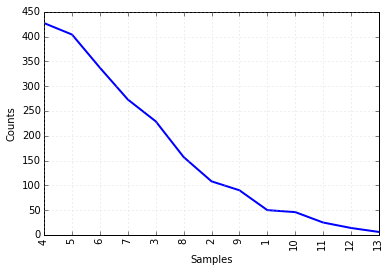

In [14]:
word_length_dist = FreqDist( [ len(w) for w in t6_vocab.keys() ] )
word_length_dist.plot()

We can plot where in the text a word occurs, and compare it to other words, with a *dispersion plot*. For example, the following dispersion plots show respectively (among other things) that the words 'coconut' and 'swallow' almost always appear in the same part of the *Holy Grail* text, and that Willoughby and Lucy do not appear in *Sense and Sensibility* until some time after the beginning of the book.

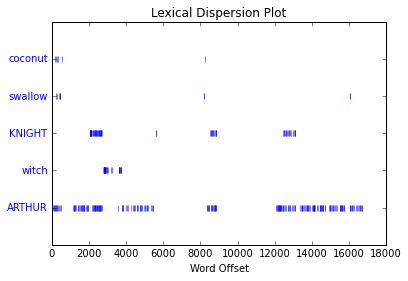

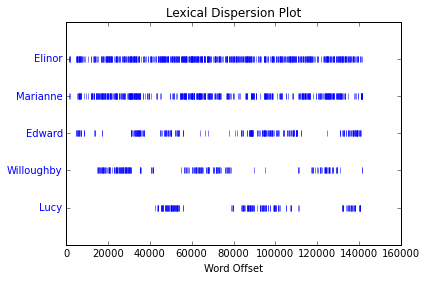

In [15]:
text6.dispersion_plot(["coconut", "swallow", "KNIGHT", "witch", "ARTHUR"])

text2.dispersion_plot(["Elinor", "Marianne", "Edward", "Willoughby", "Lucy"])

We can go a little crazy with text statistics. This block of code computes the average word length for each text, as well as a measure known as the "lexical diversity" that measures how much word re-use there is in a text.

In [16]:
def print_text_stats( thetext ):
    # Average word length
    awl = sum([len(w) for w in thetext]) / len( thetext ) 
    ld = len( thetext ) / len( thetext.vocab() )
    print("%.2f\t%.2f\t%s" % ( awl, ld, thetext.name ))
    
all_texts = [ text1, text2, text3, text4, text5, text6, text7, text8, text9 ]
print("Wlen\tLdiv\tTitle")
for t in all_texts:
    print_text_stats( t )


Wlen	Ldiv	Title
3.83	13.50	Moby Dick by Herman Melville 1851
3.88	20.72	Sense and Sensibility by Jane Austen 1811
3.51	16.05	The Book of Genesis
4.39	14.94	Inaugural Address Corpus
3.51	7.42	Chat Corpus
3.12	7.83	Monty Python and the Holy Grail
4.41	8.11	Wall Street Journal
3.64	4.39	Personals Corpus
3.77	10.17	The Man Who Was Thursday by G . K . Chesterton 1908


A text of your own
------------------

So far we have been using the sample texts, but we can also use any text that we have lying around on our computer. The easiest sort of text to read in is plaintext, not PDF or HTML or anything else. Once we have made the text into an NLTK text with the `Text()` function, we can use all the same methods on it as we did for the sample texts above.

In [17]:
from nltk import word_tokenize

# You can read the file this way:
f = open('alice.txt', encoding='utf-8')
raw = f.read()
f.close()

# or you can read it this way.
with open('alice.txt', encoding='utf-8') as f:
    raw = f.read()

# Use NLTK to break the text up into words, and put the result into a 
# Text object.
alice = Text( word_tokenize( raw ) )
alice.name = "Alice's Adventures in Wonderland"
print(alice.name)
alice.concordance( "cat" )
print_text_stats( alice )


Alice's Adventures in Wonderland
Displaying 25 of 36 matches:
 , I should think ! ' ( Dinah was the cat . ) 'I hope they 'll remember her sau
. And yet I wish I could show you our cat Dinah : I think you'd take a fancy to
to talk about her pet : 'Dinah 's our cat . And she 's such a capital one for c
 here , and I 'm sure she 's the best cat in the world ! Oh , my dear Dinah ! I
 sneeze , were the cook , and a large cat which was sitting on the hearth and g
rs for her to speak first , 'why your cat grins like that ? ' 'It 's a Cheshire
grins like that ? ' 'It 's a Cheshire cat , ' said the Duchess , 'and that 's w
ittle startled by seeing the Cheshire Cat sitting on a bough of a tree a few ya
bough of a tree a few yards off . The Cat only grinned when it saw Alice . It l
where you want to get to , ' said the Cat . 'I do n't much care where -- ' said
 you 're sure to do that , ' said the Cat , 'if you only walk long enough . ' A
t here ? ' 'In THAT direction , ' the Cat said , waving it

Using text corpora
------------------

NLTK comes with several pre-existing corpora of texts, some of which are the main body of text used for certain sorts of linguistic research. Using a corpus of texts, as opposed to an individual text, brings us a few more features.

In [18]:
from nltk.corpus import gutenberg

print(gutenberg.fileids())
paradise_lost = Text( gutenberg.words( "milton-paradise.txt" ) )
paradise_lost

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


<Text: Paradise Lost by John Milton 1667>

*Paradise Lost* is now a Text object, just like the ones we have worked on before. But we accessed it through the __NLTK corpus reader__, which means that we get some extra bits of functionality:

In [19]:
print("Length of text is:", len( gutenberg.raw( "milton-paradise.txt" )))
print("Number of words is:", len( gutenberg.words( "milton-paradise.txt" )))
assert( len( gutenberg.words( "milton-paradise.txt" )) == len( paradise_lost ))
print("Number of sentences is:", len( gutenberg.sents( "milton-paradise.txt" )))
print("Number of paragraphs is:", len( gutenberg.paras( "milton-paradise.txt" )))

Length of text is: 468220
Number of words is: 96825
Number of sentences is: 1851
Number of paragraphs is: 29


We can also make our own corpus if we have our own collection of files, e.g. the Federalist Papers from last week. But we have to pay attention to how those files are arranged! In this case, if you look in the text file, the paragraphs are set apart with 'hanging indentation' - all the lines 

In [20]:
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus.reader.util import read_regexp_block

# Define how paragraphs look in our text files.
def read_hanging_block( stream ):
    return read_regexp_block( stream, "^[A-Za-z]" )

corpus_root = 'federalist'
file_pattern = 'federalist_.*\.txt'
federalist = PlaintextCorpusReader( corpus_root, file_pattern, para_block_reader=read_hanging_block )
print("List of texts in corpus:", federalist.fileids())
print("\nHere is the fourth paragraph of the first text:")
print(federalist.paras("federalist_1.txt")[3])

List of texts in corpus: ['federalist_1.txt', 'federalist_10.txt', 'federalist_11.txt', 'federalist_12.txt', 'federalist_13.txt', 'federalist_14.txt', 'federalist_15.txt', 'federalist_16.txt', 'federalist_17.txt', 'federalist_18.txt', 'federalist_19.txt', 'federalist_2.txt', 'federalist_20.txt', 'federalist_21.txt', 'federalist_22.txt', 'federalist_23.txt', 'federalist_24.txt', 'federalist_25.txt', 'federalist_26.txt', 'federalist_27.txt', 'federalist_28.txt', 'federalist_29.txt', 'federalist_3.txt', 'federalist_30.txt', 'federalist_31.txt', 'federalist_32.txt', 'federalist_33.txt', 'federalist_34.txt', 'federalist_35.txt', 'federalist_36.txt', 'federalist_37.txt', 'federalist_38.txt', 'federalist_39.txt', 'federalist_4.txt', 'federalist_40.txt', 'federalist_41.txt', 'federalist_42.txt', 'federalist_43.txt', 'federalist_44.txt', 'federalist_45.txt', 'federalist_46.txt', 'federalist_47.txt', 'federalist_48.txt', 'federalist_49.txt', 'federalist_5.txt', 'federalist_50.txt', 'federalist_5

And just like before, from this corpus we can make individual Text objects, on which we can use the methods we have seen above.

In [21]:
fed1 = Text( federalist.words( "federalist_1.txt" ))
print("The first Federalist Paper has the following word collocations:")
fed1.collocations()
print("\n...and the following most frequent words.")
fed1.vocab().most_common(50)

The first Federalist Paper has the following word collocations:
new Constitution; every State; right side; public good; good men

...and the following most frequent words.


[('the', 114),
 (',', 103),
 ('of', 97),
 ('to', 61),
 ('.', 48),
 ('and', 37),
 ('be', 34),
 ('that', 26),
 ('in', 24),
 ('will', 24),
 ('a', 23),
 ('which', 17),
 ('it', 15),
 ('by', 14),
 ('not', 14),
 ('I', 14),
 ('their', 13),
 ('THE', 12),
 ('is', 12),
 ('are', 12),
 ('may', 11),
 ('from', 11),
 ('than', 11),
 ('have', 10),
 ('for', 10),
 ('as', 10),
 ('an', 9),
 ('all', 9),
 ('those', 9),
 ('this', 9),
 ('TO', 8),
 ('your', 8),
 ('its', 8),
 ('we', 8),
 ('who', 8),
 ('men', 8),
 ('on', 8),
 ('OF', 8),
 ('more', 7),
 ('at', 7),
 (';', 7),
 ('shall', 7),
 ('my', 6),
 ('good', 6),
 ('government', 6),
 ('you', 6),
 ('any', 6),
 ('upon', 6),
 ('has', 6),
 ('or', 6)]

Filtering out stopwords
-----------------------

In linguistics, *stopwords* or *function words* are words that are so frequent in a particular language that they say little to nothing about the meaning of a text. You can make your own list of stopwords, but NLTK also provides a list for each of several common languages. These sets of stopwords are provided as another corpus.

In [22]:
from nltk.corpus import stopwords
print("We have stopword lists for the following languages:")
print(stopwords.fileids())
print("\nThese are the NLTK-provided stopwords for the German language:")
print(", ".join( stopwords.words('german') ))

We have stopword lists for the following languages:
['danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'portuguese', 'russian', 'spanish', 'swedish', 'turkish']

These are the NLTK-provided stopwords for the German language:
aber, alle, allem, allen, aller, alles, als, also, am, an, ander, andere, anderem, anderen, anderer, anderes, anderm, andern, anderr, anders, auch, auf, aus, bei, bin, bis, bist, da, damit, dann, der, den, des, dem, die, das, daß, derselbe, derselben, denselben, desselben, demselben, dieselbe, dieselben, dasselbe, dazu, dein, deine, deinem, deinen, deiner, deines, denn, derer, dessen, dich, dir, du, dies, diese, diesem, diesen, dieser, dieses, doch, dort, durch, ein, eine, einem, einen, einer, eines, einig, einige, einigem, einigen, einiger, einiges, einmal, er, ihn, ihm, es, etwas, euer, eure, eurem, euren, eurer, eures, für, gegen, gewesen, hab, habe, haben, hat, hatte, hatten, hier, hin, hinter, ich, mich, mir, ihr

So reading in the stopword list, we can use it to filter out vocabulary we don't want to see. Let's look at our 50 most frequent words in *Holy Grail* again.

In [23]:
print("The most frequent words are: ")
print([word[0] for word in t6_vocab.most_common(50)])

f1_most_frequent = [ w[0] for w in t6_vocab.most_common() if w[0].lower() not in stopwords.words('english') ]
print("\nThe most frequent interesting words are:  ", "  ".join( f1_most_frequent[:50] ))

The most frequent words are: 
[':', '.', '!', ',', "'", '[', ']', 'the', 'I', 'ARTHUR', '?', 'you', 'a', 'of', '--', 'to', 's', 'and', '#', '...', 'Oh', 'it', 'is', '-', 'in', 'that', 't', 'LAUNCELOT', 'No', '1', 'your', 'not', 'GALAHAD', 'KNIGHT', 'What', 'FATHER', 'we', 'You', 'BEDEVERE', 'We', 'this', 'no', 'HEAD', 'Well', 'have', 'GUARD', 'Sir', 'are', 'And', 'A']

The most frequent interesting words are:   :  .  !  ,  '  [  ]  ARTHUR  ?  --  #  ...  Oh  -  LAUNCELOT  1  GALAHAD  KNIGHT  FATHER  BEDEVERE  HEAD  Well  GUARD  Sir  Ni  VILLAGER  boom  Yes  2  ha  re  clop  ROBIN  away  witch  KNIGHTS  Arthur  m  Grail  one  BLACK  Burn  us  singing  mumble  TIM  music  squeak  FRENCH  got


Maybe we should get rid of punctuation and all-caps words too...

In [24]:
import re

def is_interesting( w ):
    if( w.lower() in stopwords.words('english') ):
        return False
    if( w.isupper() ):
        return False
    return w.isalpha()

f1_most_frequent = [ w[0] for w in t6_vocab.most_common() if is_interesting( w[0] ) ]
print("The most frequent interesting words are: ", "  ".join( f1_most_frequent[:50] ))

The most frequent interesting words are:  Oh  Well  Sir  Ni  boom  Yes  ha  re  clop  away  witch  Arthur  m  Grail  one  Burn  us  singing  mumble  music  squeak  got  King  Right  Hello  uh  Camelot  Come  Launcelot  tell  Look  Holy  must  go  going  dead  ve  right  Run  shall  get  ll  Robin  think  come  Knights  castle  see  brave  Ha


Getting word stems
------------------

Quite frequently we might want to treat different forms of a word - e.g. 'make / makes / made / making' - as the same word. A common way to do this is to find the *stem* of the word and use that in your analysis, in place of the word itself. There are several different approaches that can be takenNone of them are perfect, and quite frequently linguists will write their own stemmers.

Let's chop out a paragraph of *Alice in Wonderland* to play with.

In [25]:
my_text = alice[305:549]
print(" ". join( my_text ))
print(len( set( my_text )), "words")

In another moment down went Alice after it , never once considering how in the world she was to get out again . The rabbit-hole went straight on like a tunnel for some way , and then dipped suddenly down , so suddenly that Alice had not a moment to think about stopping herself before she found herself falling down a very deep well . Either the well was very deep , or she fell very slowly , for she had plenty of time as she went down to look about her and to wonder what was going to happen next . First , she tried to look down and make out what she was coming to , but it was too dark to see anything ; then she looked at the sides of the well , and noticed that they were filled with cupboards and book-shelves ; here and there she saw maps and pictures hung upon pegs . She took down a jar from one of the shelves as she passed ; it was labelled 'ORANGE MARMALADE ' , but to her great disappointment it was empty : she did not like to drop the jar for fear of killing somebody , so managed to 

NLTK comes with a few different stemming algorithms; we can also use WordNet (a system for analyzing semantic relationships between words) to look for the lemma form of each word and "stem" it that way. Here are some results.

In [26]:
from nltk import PorterStemmer, LancasterStemmer, WordNetLemmatizer

porter = PorterStemmer()
lanc = LancasterStemmer()
wnl = WordNetLemmatizer()

porterlist = [porter.stem(w) for w in my_text]
print(" ".join( porterlist ))
print(len( set( porterlist )), "Porter stems")
lanclist = [lanc.stem(w) for w in my_text]
print(" ".join( lanclist ))
print(len( set( lanclist )), "Lancaster stems")
wnllist = [ wnl.lemmatize(w) for w in my_text ]
print(" ".join( wnllist ))
print(len( set( wnllist )), "Wordnet lemmata")


In anoth moment down went Alic after it , never onc consid how in the world she wa to get out again . The rabbit-hol went straight on like a tunnel for some way , and then dip suddenli down , so suddenli that Alic had not a moment to think about stop herself befor she found herself fall down a veri deep well . Either the well wa veri deep , or she fell veri slowli , for she had plenti of time as she went down to look about her and to wonder what wa go to happen next . First , she tri to look down and make out what she wa come to , but it wa too dark to see anyth ; then she look at the side of the well , and notic that they were fill with cupboard and book-shelv ; here and there she saw map and pictur hung upon peg . She took down a jar from one of the shelv as she pass ; it wa label 'ORANG MARMALAD ' , but to her great disappoint it wa empti : she did not like to drop the jar for fear of kill somebodi , so manag to put it into one of the cupboard as she fell past it . 'Well ! ' thought

Part-of-speech tagging
----------------------

This is where corpus linguistics starts to get interesting. In order to analyze a text computationally, it is useful to know its syntactic structure - what words are nouns, what are verbs, and so on? This can be done (again, imperfectly) by using *part-of-speech tagging.*

In [27]:
from nltk import pos_tag

print(pos_tag(my_text))

[('In', 'IN'), ('another', 'DT'), ('moment', 'NN'), ('down', 'IN'), ('went', 'NN'), ('Alice', 'NNP'), ('after', 'IN'), ('it', 'PRP'), (',', ','), ('never', 'RB'), ('once', 'RB'), ('considering', 'VBG'), ('how', 'WRB'), ('in', 'IN'), ('the', 'DT'), ('world', 'NN'), ('she', 'PRP'), ('was', 'VBD'), ('to', 'TO'), ('get', 'VB'), ('out', 'IN'), ('again', 'RB'), ('.', '.'), ('The', 'DT'), ('rabbit-hole', 'JJ'), ('went', 'NN'), ('straight', 'RB'), ('on', 'IN'), ('like', 'IN'), ('a', 'DT'), ('tunnel', 'NN'), ('for', 'IN'), ('some', 'DT'), ('way', 'NN'), (',', ','), ('and', 'CC'), ('then', 'RB'), ('dipped', 'VBD'), ('suddenly', 'RB'), ('down', 'IN'), (',', ','), ('so', 'RB'), ('suddenly', 'RB'), ('that', 'IN'), ('Alice', 'NNP'), ('had', 'VBD'), ('not', 'RB'), ('a', 'DT'), ('moment', 'NN'), ('to', 'TO'), ('think', 'VB'), ('about', 'IN'), ('stopping', 'VBG'), ('herself', 'PRP'), ('before', 'IN'), ('she', 'PRP'), ('found', 'VBD'), ('herself', 'PRP'), ('falling', 'VBG'), ('down', 'IN'), ('a', 'DT'),

NLTK part-of-speech tags (simplified tagset)
------------------------

| Tag | Meaning            | Examples                             |
|-----|--------------------|--------------------------------------|
| JJ  | adjective          | new, good, high, special, big, local |
| RB  | adverb             | really, already, still, early, now   |
| CC  | conjunction        | and, or, but, if, while, although    |
| DT  | determiner         | the, a, some, most, every, no        |
| EX  | existential        | there, there's                       |
| FW  | foreign word       | dolce, ersatz, esprit, quo, maitre   |
| MD  | modal verb         | will, can, would, may, must, should  |
| NN  | noun               | year, home, costs, time, education   |
| NNP | proper noun        | Alison, Africa, April, Washington    |
| NUM | number             | twenty-four, fourth, 1991, 14:24     |
| PRO | pronoun            | he, their, her, its, my, I, us       |
| IN  | preposition        | on, of, at, with, by, into, under    |
| TO  | the word to        | to                                   |
| UH  | interjection       | ah, bang, ha, whee, hmpf, oops       |
| VB  | verb               | is, has, get, do, make, see, run     |
| VBD | past tense         | said, took, told, made, asked        |
| VBG | present participle | making, going, playing, working      |
| VN  | past participle    | given, taken, begun, sung            |
| WRB | wh determiner      | who, which, when, what, where, how   |

Automated tagging is pretty good, but not perfect. There are other taggers out there, such as the Brill tagger and the TreeTagger, but these aren't set up to run 'out of the box' and, with TreeTagger in particular, you will have to download extra software.

Some of the bigger corpora in NLTK come pre-tagged; this is a useful way to __train__ a tagger that uses machine-learning methods (such as Brill), and a good way to test any new tagging method that is developed. This is also the data from which our knowledge of how language is used comes from. (At least, English and some other major Western languages.)

In [28]:
from nltk.corpus import brown

print(brown.tagged_words()[:25])
print(brown.tagged_words(tagset='universal')[:25])

[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')]
[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')]


We can even do a frequency plot of the different parts of speech in the corpus (if we have `matplotlib` installed!)

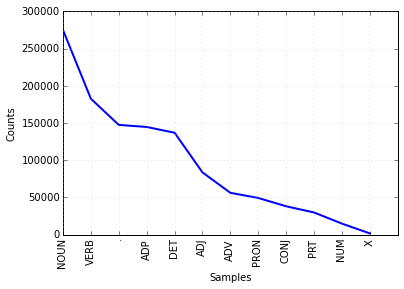

In [29]:
tagged_word_fd = FreqDist([ w[1] for w in brown.tagged_words(tagset='universal') ])
tagged_word_fd.plot()

Named-entity recognition
------------------------

As well as the parts of speech of individual words, it is useful to be able to analyze the structure of an entire sentence. This generally involves breaking the sentence up into its component phrases, otherwise known as chunking. 

Not going to cover chunking here as there is no out-of-the-box chunker for NLTK! You are expected to define the grammar (or at least some approximation of the grammar), and once you have done that then it becomes possible.

But one application of chunking is named-entity recognition - parsing a sentence to identify the named people, places, and organizations therein. This is more difficult than it looks, e.g. "Yankee", "May", "North".

Here's how to do it. We will use the example sentences that were loaded in `sent1` through `sent9` to try it out. Notice the difference (in iPython only!) between printing the result and just looking at the result - if you try to show the graph for more than one sentence at a time then you'll be waiting a *long* time. So don't try it.

(S
  The/DT
  family/NN
  of/IN
  (PERSON Dashwood/NNP)
  had/VBD
  long/RB
  been/VBN
  settled/VBN
  in/IN
  (GPE Sussex/NNP)
  ./.)


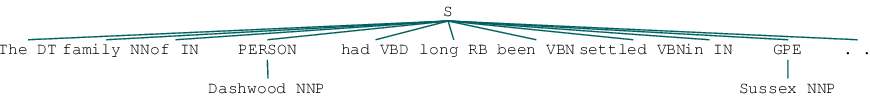

In [30]:
from nltk import ne_chunk

tagged_text = pos_tag(sent2)
ner_text = ne_chunk( tagged_text )
print(ner_text)
ner_text

Here is a function that takes the result of `ne_chunk` (the plain-text form, not the graph form!) and spits out only the named entities that were found.

In [31]:
def list_named_entities( tree ):
    try:
        tree.label()
    except AttributeError:
        return
    if( tree.label() != "S" ):
        print(tree)
    else:
        for child in tree:
            list_named_entities( child )
            
list_named_entities( ner_text )

(PERSON Dashwood/NNP)
(GPE Sussex/NNP)


And there you have it - an introductory tour of what is probably the best-available code toolkit for natural language processing. If this sort of thing interests you, then there is an entire book-length tutorial about it:

http://www.nltk.org/book/

Have fun!